Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [301]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [302]:
#Load the data set
train = pd.read_csv("/Users/azharsharieff/Desktop/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data understanding

In [303]:
# checking Percentage of missing values
(train.isnull().sum()/len(train['PassengerId'])) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [304]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [305]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


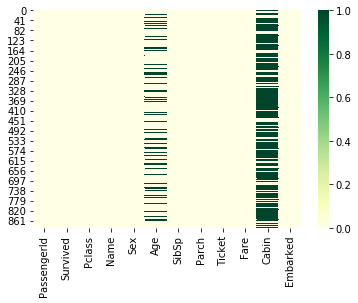

In [306]:
# ploting heat map for missing values
sns.heatmap(train.isnull(), cmap = "YlGn")
plt.show()

From the above heatmap,  there are some missing values in Age column and many missing values in Cabin column

### Univariate analysis

#### Categorical variables

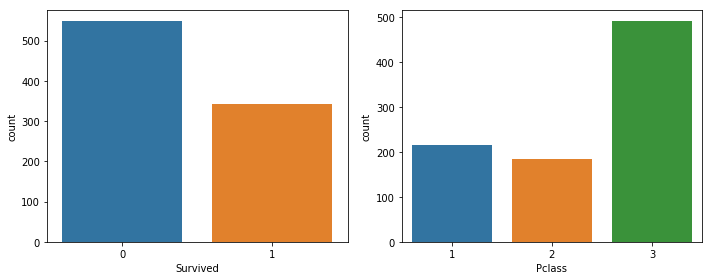

In [307]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(train['Survived'])
plt.subplot(122)
sns.countplot(train['Pclass'])
plt.tight_layout()
plt.show()

1. Plot 1, Indicates that more than 500 people died and only around 320 people could survive.
2. Plot 2, There are more passengers in class 3 then in class 1 and class 2.

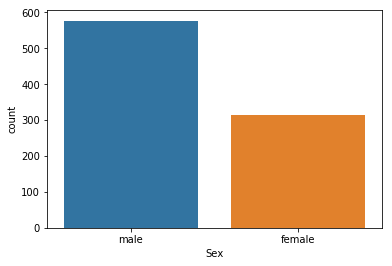

In [308]:
# checking the count of male and female passengers
sns.countplot(train['Sex'])


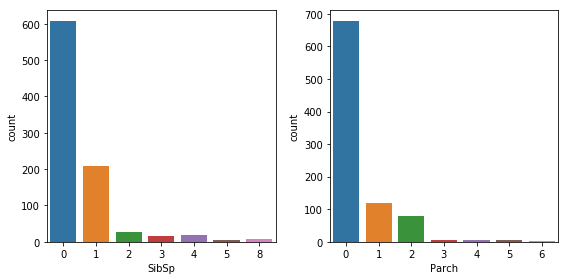

In [309]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.countplot(train['SibSp'])
plt.subplot(122)
sns.countplot(train['Parch'])
plt.tight_layout()
plt.show()

 indicates the number of passengers with no sibbling or a spouse are higher. 

#### Numerical variables

From the above distribution plot, the distribution of is normal with outliers. There are aprrox 240 passengeers of age 28.

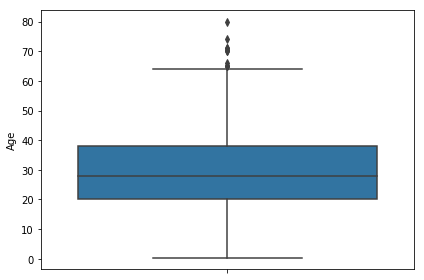

In [310]:
sns.boxplot(train['Age'], orient='v')
plt.tight_layout()
plt.show()

The boxplot shows average age of passengers is around 28. 

### Bivariate analysis

#### Categorical variables

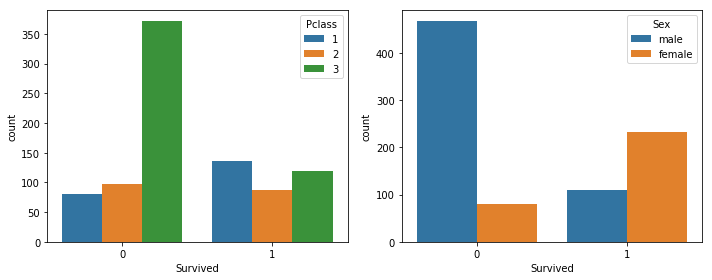

In [311]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(train.Survived, hue = train['Pclass'])
plt.subplot(122)
sns.countplot(train['Survived'], hue=train['Sex'])
plt.tight_layout()
plt.show()

1. Plot 1, shows that most passengers from class 3 could not survive.
2. Plot 2, shows most of the male passengers(approx 500) did not survive.

#### Numerical varibles

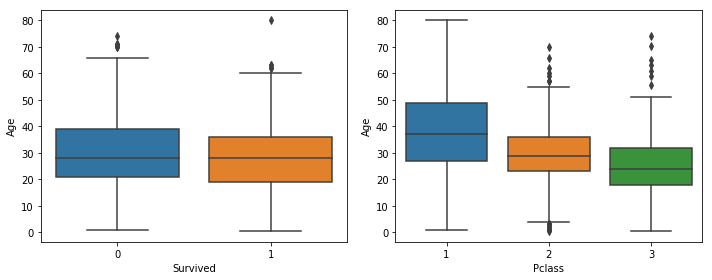

In [312]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.boxplot(x=train['Survived'],y=train['Age'])
plt.subplot(122)
sns.boxplot(x=train['Pclass'],y=train['Age'])
plt.tight_layout()
plt.show()

1. Plot 1, the approximate age of passengers who survived and those didn't survive is almost same.
2. Plot 2, the age of class 1 passengers os higher, followed by class 2 and class 3 passengers.

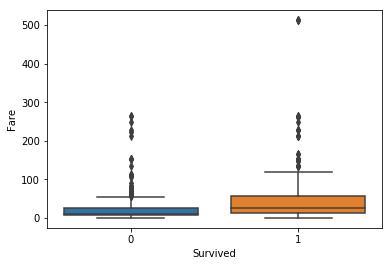

In [313]:
sns.boxplot(x=train['Survived'],y=train['Fare'])
plt.show()

The plot indicates the passenges who survived are those whose ticket fare was higher.

### Treating missing values

In [314]:
#Imputing median age per passenger class to fill the missing values of Age


conditions = [train['Pclass']==1, train['Pclass']==2, train['Pclass']==3]
values = [37,29,24]

train['Age'] = np.where(train['Age'].isnull(),
                       np.select(conditions,values),
                       train['Age'])

In [315]:
# dropping column "cabin" as it has 77% missing value
train = train.drop('Cabin', axis = 1)

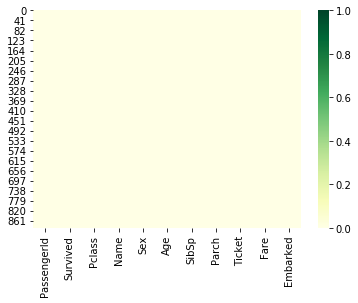

In [316]:
sns.heatmap(train.isnull(), cmap = "YlGn")

### Dropping unnecessary columns

In [317]:
# dropping columns Name/Ticket/Embarked
train.drop(['Ticket','Name','Embarked'], axis=1, inplace=True)

### Variable transformation

In [318]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [319]:
pcl = pd.get_dummies(train['Pclass'], drop_first=True)
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [320]:
# droping redundant columns
train = train.drop(['Pclass','Sex'], axis=1)

In [321]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,0,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,0,35.0,0,0,8.0500


In [322]:
train = pd.concat([train,pcl,sex], axis = 1)
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,2,3,male
0,1,0,22.0,1,0,7.2500,0,1,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,1,26.0,0,0,7.9250,0,1,0
3,4,1,35.0,1,0,53.1000,0,0,0
4,5,0,35.0,0,0,8.0500,0,1,1


In [323]:
X = train.drop(['PassengerId','Survived'], axis=1)
y= train['Survived']

### Train-Test split

In [324]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.75, random_state=100)

In [325]:
X_train.head()

,Age,SibSp,Parch,Fare,2,3,male
225,22.0,0,0,9.3500,0,1,1
856,45.0,1,1,164.8667,0,0,0
620,27.0,1,0,14.4542,0,1,1
450,36.0,1,2,27.7500,1,0,1
423,28.0,1,1,14.4000,0,1,0


### Feature scaling

In [326]:
scaler = StandardScaler()

In [327]:
X_train[['Age','Fare','SibSp','Parch']] = scaler.fit_transform(X_train[['Age','Fare','SibSp','Parch']])

In [328]:
X_train.head()

,Age,SibSp,Parch,Fare,2,3,male
225,-0.548376,-0.482510,-0.471250,-0.448944,0,1,1
856,1.190132,0.425425,0.782913,2.531505,0,0,0
620,-0.170439,0.425425,-0.471250,-0.351123,0,1,1
450,0.509846,0.425425,2.037075,-0.096311,1,0,1
423,-0.094852,0.425425,0.782913,-0.352161,0,1,0


### Model building

In [329]:
logreg = LogisticRegression()

In [330]:
logmod = RFE(logreg,7)
res = logmod.fit(X_train,y_train)

In [331]:
list(zip(X_train.columns,res.support_,res.ranking_))

[('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('Fare', True, 1),
 (2, True, 1),
 (3, True, 1),
 ('male', True, 1)]

In [332]:
res.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [333]:
features = X_train.columns[res.support_]

In [334]:
# evaluating model using Statsmodels
X_train_sm = sm.add_constant(X_train)
log_model = sm.GLM(y_train,X_train, family=sm.families.Binomial())
res = log_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  668
Model:                            GLM   Df Residuals:                      661
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.93
Date:                Thu, 26 Sep 2019   Deviance:                       643.86
Time:                        07:12:14   Pearson chi2:                     688.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.2407      0.107     -2.246      0.025      -0.451      -0.031
SibSp         -0.3821      0.129     -2.973      0.0

In [335]:
# dropping features with high p value
features = features.drop(3,1)

In [336]:
# evaluating model using Statsmodels
X_train_sm = sm.add_constant(X_train[features])
log_model = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = log_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  668
Model:                            GLM   Df Residuals:                      661
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -306.26
Date:                Thu, 26 Sep 2019   Deviance:                       612.52
Time:                        07:12:15   Pearson chi2:                     670.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9481      0.174      5.439      0.000       0.606       1.290
Age           -0.2597      0.109     -2.386      0.0

In [337]:
vif = pd.DataFrame()
vif['Features'] = X_train[features].columns
vif['VIF'] = [variance_inflation_factor(X_train[features].values,i) for i in range(X_train[features].shape[1])]
vif

,Features,VIF
0,Age,1.103728
1,SibSp,1.293710
2,Parch,1.322104
3,Fare,1.106955
4,2,1.143070
5,male,1.156319


In [338]:
y_train_prediction = res.predict(X_train_sm)
y_train_prediction[:10]
y_train_pred = y_train_prediction.values.reshape(-1)

In [339]:
survived_data = pd.DataFrame()
survived_data['Passenger_ID'] = y_train.index
survived_data['Survived'] = y_train.values
survived_data['Predicted_probability'] = y_train_pred
# creating column Survived_predicted with 0.5 as cutoff probability
survived_data['Survived_predicted'] = survived_data['Predicted_probability'].map(lambda x: 1 if x>0.5 else 0)
survived_data.head()

,Passenger_ID,Survived,Predicted_probability,Survived_predicted
0,225,0,0.153646,0
1,856,1,0.941504,1
2,620,0,0.108948,0
3,450,0,0.131619,0
4,423,0,0.561822,1


In [340]:
confusion_matrix = metrics.confusion_matrix(survived_data.Survived, survived_data.Survived_predicted)
confusion_matrix

array([[369,  53],
       [ 77, 169]])

In [341]:
accuracy_score = metrics.accuracy_score(survived_data.Survived,survived_data.Survived_predicted)
accuracy_score

0.8053892215568862

### Finding optimal threshold of survival probability

In [342]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [343]:
fpr, tpr, thresholds = metrics.roc_curve( survived_data.Survived, survived_data.Predicted_probability, 
                                        drop_intermediate = False )

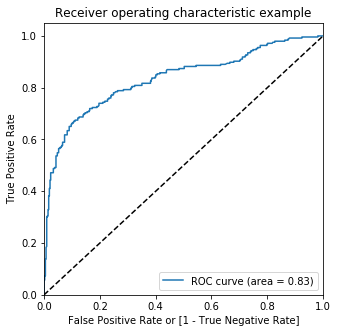

In [344]:
draw_roc(survived_data.Survived, survived_data.Predicted_probability)

In [345]:
# Lets create columns with probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    survived_data[i] = survived_data.Predicted_probability.map(lambda x: 1 if x > i else 0)
survived_data.head()

,Passenger_ID,Survived,Predicted_probability,Survived_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,225,0,0.153646,0,1,1,0,0,0,0,0,0,0,0
1,856,1,0.941504,1,1,1,1,1,1,1,1,1,1,1
2,620,0,0.108948,0,1,1,0,0,0,0,0,0,0,0
3,450,0,0.131619,0,1,1,0,0,0,0,0,0,0,0
4,423,0,0.561822,1,1,1,1,1,1,1,0,0,0,0


In [346]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(survived_data.Survived,survived_data[i])
    totall = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/totall
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.368263  1.000000  0.000000
0.1   0.1  0.441617  0.991870  0.120853
0.2   0.2  0.727545  0.804878  0.682464
0.3   0.3  0.779940  0.723577  0.812796
0.4   0.4  0.799401  0.699187  0.857820
0.5   0.5  0.805389  0.686992  0.874408
0.6   0.6  0.811377  0.654472  0.902844
0.7   0.7  0.805389  0.560976  0.947867
0.8   0.8  0.742515  0.329268  0.983412
0.9   0.9  0.672156  0.117886  0.995261


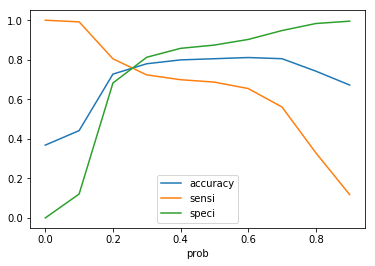

In [347]:
# plotting accuracy, sensitivity and specificity for various probabilities
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.show()

From the above plot, the optimal cutoff point can be at 0.3

In [348]:
#creating confusion matrix
confusion_matrix = metrics.confusion_matrix(survived_data.Survived, survived_data.Survived_predicted)
confusion_matrix

array([[369,  53],
       [ 77, 169]])

In [349]:
# Accuracy score of confusion matrix
accuracy_score = metrics.accuracy_score(survived_data.Survived,survived_data.Survived_predicted)
accuracy_score

0.8053892215568862

In [350]:
# Precision recall curve
p,r,thresholds = precision_recall_curve(survived_data.Survived, survived_data.Predicted_probability)

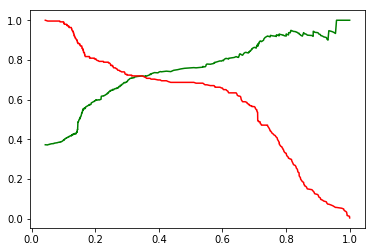

In [351]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [352]:
print(classification_report(survived_data.Survived,survived_data.Survived_predicted))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       422
           1       0.76      0.69      0.72       246

   micro avg       0.81      0.81      0.81       668
   macro avg       0.79      0.78      0.79       668
weighted avg       0.80      0.81      0.80       668



### Updating predicted values with new cut off value

In [353]:
survived_data['Survived_predicted'] = survived_data.Predicted_probability.map(lambda x: 1 if x > 0.3 else 0)

In [354]:
confusion_matrix = metrics.confusion_matrix(survived_data.Survived,survived_data.Survived_predicted)
confusion_matrix

array([[343,  79],
       [ 68, 178]])

In [355]:
accuracy_score = metrics.accuracy_score(survived_data.Survived,survived_data.Survived_predicted)
accuracy_score

0.7799401197604791

### Making Predictions on test set

In [356]:
X_test[['Age','Fare','SibSp','Parch']] = scaler.transform(X_test[['Age','Fare','SibSp','Parch']])

In [357]:
X_test = X_test[features]

In [368]:
X_test_sm = sm.add_constant(X_test)


In [359]:
y_test_pred = res.predict(X_test_sm)

In [360]:
y_test_pred[:10]

205    0.746151
44     0.730916
821    0.139733
458    0.766197
795    0.227193
118    0.922963
424    0.107243
678    0.279510
269    0.957572
229    0.437620
dtype: float64

In [361]:
y_test.head()

205    0
44     1
821    1
458    1
795    0
Name: Survived, dtype: int64

In [362]:
# creating data frame with actual and predicted values
y_final = pd.DataFrame()
y_final['Actual_survived'] = y_test.values
y_final['Passenger_ID']= y_test.index
y_final['Survive_probability'] = y_test_pred.values.reshape(-1)
y_final['Survive_predicted'] = y_final['Survive_probability'].map(lambda x: 1 if x> 0.3 else 0)

In [363]:
y_final.head()

,Actual_survived,Passenger_ID,Survive_probability,Survive_predicted
0,0,205,0.746151,1
1,1,44,0.730916,1
2,1,821,0.139733,0
3,1,458,0.766197,1
4,0,795,0.227193,0


In [364]:
# creating confusion matrix
confusion_matrix = metrics.confusion_matrix(y_final.Actual_survived,y_final.Survive_predicted)
confusion_matrix

array([[105,  22],
       [ 31,  65]])

In [365]:
accuracy_score = metrics.accuracy_score(y_final.Actual_survived,y_final.Survive_predicted)
accuracy_score

0.7623318385650224

In [366]:
print(classification_report(y_final.Actual_survived,y_final.Survive_predicted))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       127
           1       0.75      0.68      0.71        96

   micro avg       0.76      0.76      0.76       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



### Conclusion

The model indicates that people who paid high fare for the tickets (mostly class 1 passengers) had higher chances of survival. The factors are woman and children had higher chances when compared male passengers. 